In [1]:
# necessary imports

import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from numpy import mgrid, sum
from scipy.linalg import eigh

Q1. 1) Write a function to compute the 7 similitude moment shape descriptors. Test and
compare results on the rectangle box images ‘boxIm[1-4].bmp’ on the website (you
are to provide the 7 computed moment values). Normalize each image before
computing the moments so that the range of grayscale values is between 0-1. How do
the moments change across the box images? Why are some moments zero? Please
make sure your function will work with non-binary (grayscale) imagery, as you will
need this for later assignments (do not use Matlab’s regionprops function). [4 pts]

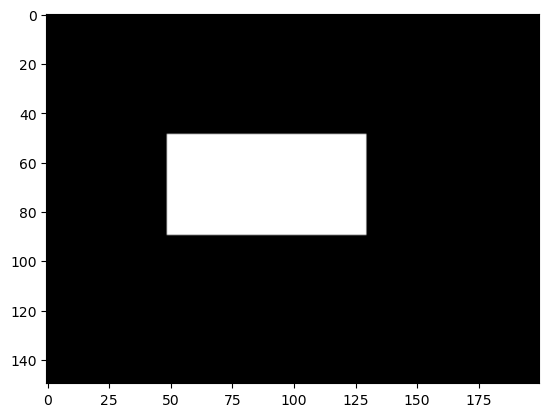

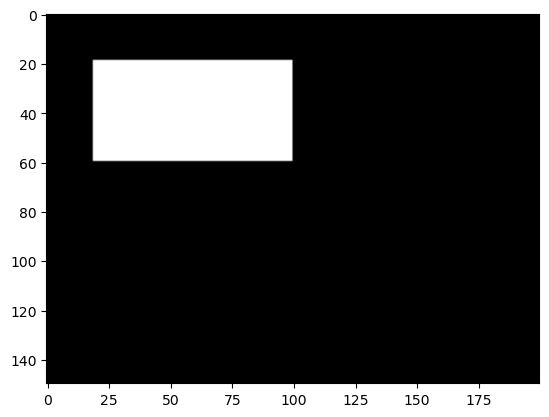

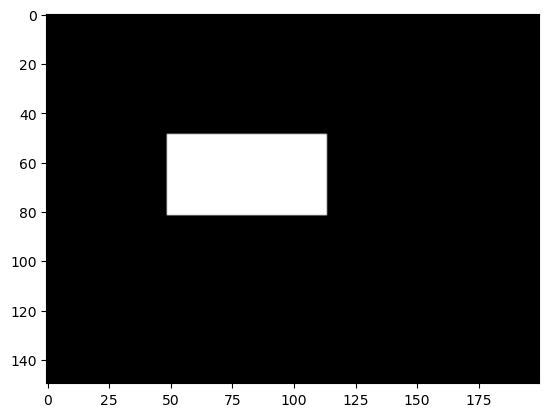

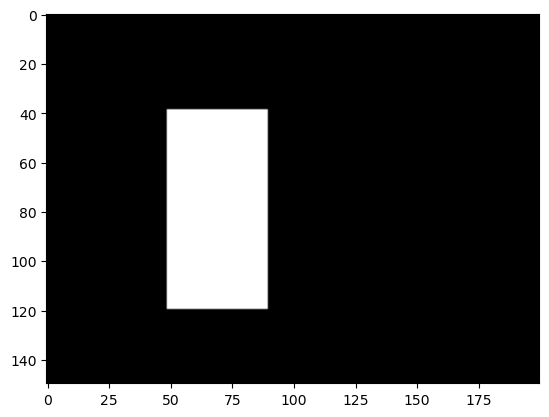

In [2]:
# read the image
boxIm1 = plt.imread('boxIm1.bmp')
boxIm2 = plt.imread('boxIm2.bmp')
boxIm3 = plt.imread('boxIm3.bmp')
boxIm4 = plt.imread('boxIm4.bmp')



# display the image and set the colormap as gray
plt.imshow(boxIm1, cmap='gray')
plt.show()

plt.imshow(boxIm2, cmap='gray')
plt.show()

plt.imshow(boxIm3, cmap='gray')
plt.show()

plt.imshow(boxIm4, cmap='gray')
plt.show()

In [3]:
# normalize the image pixel values to range from 0 to 1

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [4]:
# moments formula

def cal_moments(image, i, j, mean_x, mean_y, x, y):
    
    return sum((pow((x - mean_x), i)) * (pow((y - mean_y), j)) * image) / pow(sum(image), ((i+j)/ 2) + 1)

In [5]:
def simultitude_moment(image):
    
    y,x = np.mgrid[:image.shape[0],:image.shape[1]]
    
    mean_x = sum(x*image)/sum(image)
    mean_y = sum(y*image)/sum(image)
    
    moments = []

    norm_image = normalize_data(image)
    
    # find moments
    for i in range(0, 4):
        for j in range(0, 4):
            if i+j == 2 or i+j ==3:
                value = cal_moments(norm_image, i, j, mean_x, mean_y, x, y)
                moments.append(value)
                #print("i, j:", i, j)
    return moments

In [6]:
simultitude_moment(boxIm1)

[0.04215597711532671, 0.0, 0.0, 0.0, 0.1646090534979424, 0.0, 0.0]

In [7]:
simultitude_moment(boxIm2)

[0.04215597711532671, 0.0, 0.0, 0.0, 0.1646090534979424, 0.0, 0.0]

In [8]:
simultitude_moment(boxIm3)

[0.04226884226884227, 0.0, 0.0, 0.0, 0.1641025641025641, 0.0, 0.0]

In [9]:
simultitude_moment(boxIm4)

[0.1646090534979424, 0.0, 0.0, 0.0, 0.04215597711532671, 0.0, 0.0]

- Simultitude Moments are utilised for image analysis and object representation. It is considered as scale and rotation invariant. 
- If we want to compare two objects and tell if their shape is similar, we can calculate their moments and compare them. 
- For the above images, look how all the 7 moments are same for box-image-1 and box-image-2. That is because both of them are identical images and moments are invariant to location. 
- For box-image-3, values of moments differ a bit because of different scale, but still pretty similar to the other two. The difference is because of the change in scale. 
- For box-image-4, the values seem to have swapped between n02 and n20 as compared to other images and this is because the image is inverted. 
- Wherever the moment values are zeroes they represent that center of mass in the nth order is zero around that axis. 

Q2. Using the datafile (eigdata.txt) provided on the WWW site, perform the following
MATLAB commands [1 pt]:

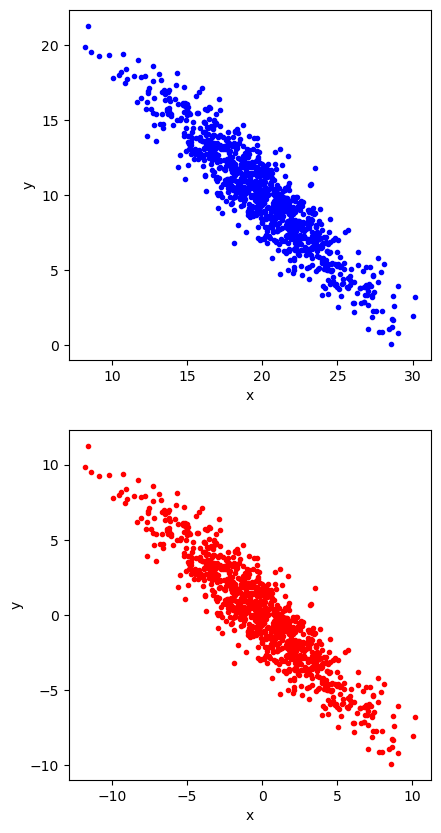

In [10]:
# load the data

X = np.loadtxt("eigdata.txt", dtype=float)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 1, 1)
plt.plot(X[:, 0], X[:, 1], 'b.')
ax.set_aspect('equal')


plt.xlabel("x")
plt.ylabel("y")


# mean subtracted data

m = X.mean(axis = 0)
Y = X - (np.ones((X[:, 0].size, 1)) * m)
ax = fig.add_subplot(2, 1, 2)
plt.plot(Y[:, 0], Y[:, 1], 'r.')
ax.set_aspect('equal')

plt.xlabel("x")
plt.ylabel("y")


plt.show()

- Y represents the mean subtracted data and is plotted in red above. 
- Here now data is transformed such that the new mean is 0 and the data spread can be seen around the same. 

3) Compute the eigenvalues (V) and eigenvectors (U) of the data (stored in Y) using the
function eig() in Matlab (recall that you use either the covariance matrix or the
inverse-covariance matrix of the data – see class notes). Plot the mean-subtracted
data Y and the 2-D Gaussian ellipse axes for given the eigenvectors in U (you can use
the plot command in Matlab for this. Make sure the axes have equal scale in the
plot!). Use the eigenvalues in V to give the appropriate 3σ (standard deviation - not
variance!) length to each axis (did you compute the eigenvalues from the covariance
or inverse covariance of Y? The eigenvalues will be related but different! See class
notes). [4 pts]

In [11]:
# inverse covariance matrix is used

inverse_covariance_matrix = np.cov(Y.T)

eigenvalues_V,eigenvector_U = np.linalg.eig(inverse_covariance_matrix)

In [12]:
# eigenvalues of the inverse-covariance matrix of the data

eigenvalues_V

array([24.13847816,  1.01422313])

In [13]:
# eigenvector of the inverse-covariance matrix of the data

eigenvector_U

array([[ 0.71259733,  0.70157327],
       [-0.70157327,  0.71259733]])

In [14]:
# 3 standard deviation of the eigenvalues 

C = 3 * np.std(eigenvalues_V)

In [15]:
# calculate the length of axis(s)

axis_length_1 = 2 * math.sqrt(C) * (1/math.sqrt(eigenvalues_V[0]))
axis_length_2 = 2 * math.sqrt(C) * (1/math.sqrt(eigenvalues_V[1]))

In [16]:
axis_length_1

2.3974775958067656

In [17]:
axis_length_2

11.69614504689038

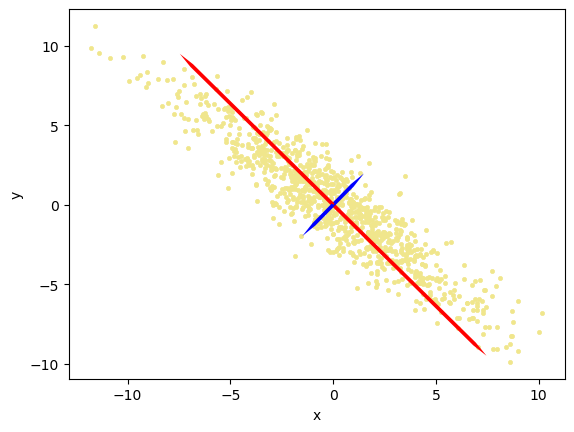

In [18]:
# Plot 

origin = [0, 0]

eig_vec1 = eigenvector_U[:,0]
eig_vec2 = eigenvector_U[:,1]

eigenvector_U_reversed = eigenvector_U * -1

eig_vec3 = eigenvector_U_reversed[:,0]
eig_vec4 = eigenvector_U_reversed[:,1]

plt.scatter(Y[:,0], Y[:,1], linewidth=0.5, marker='.', color='khaki')

plt.quiver(*origin, *eig_vec1, headlength=0, color=['r'], headwidth=0, scale = 1/axis_length_2, scale_units='xy')
plt.quiver(*origin, *eig_vec2, headlength=0, color=['b'], headwidth=0, scale = 1/axis_length_1, scale_units='xy')

plt.quiver(*origin, *eig_vec3, headlength=0, color=['r'], headwidth=0, scale = 1/axis_length_2, scale_units='xy')
plt.quiver(*origin, *eig_vec4, headlength=0, color=['b'], headwidth=0, scale = 1/axis_length_1, scale_units='xy')

plt.xlabel("x")
plt.ylabel("y")


plt.show()

- The spread of the Y data has been show in khaki color here. 
- The two axis has been shown in the red and blue color here. 
- See how axis actually match the orientation of the data represented. 
- The red axis is able to capture most of the spread of the data along the ellpise.  

Q4. Rotate Y using the eigenvectors to make the data uncorrelated (i.e., project data Y
onto the eigenvectors – see class slides). Plot the results (using equal scale axes as
before). [2 pts]

In [19]:
# find the dot product between eigenvetor and actual data Y 
Y_uncorrelated = np.dot(Y, eigenvector_U)

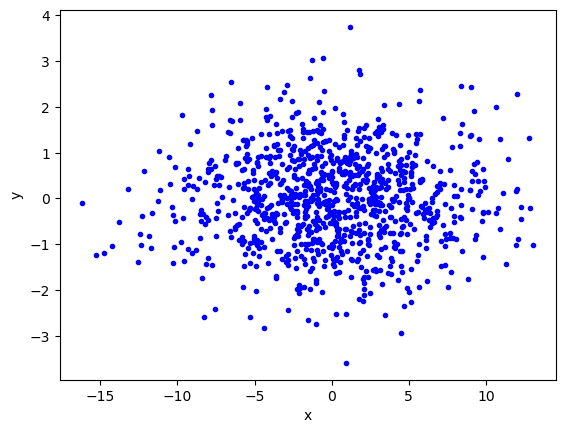

In [20]:
plt.plot(Y_uncorrelated[:, 0], Y_uncorrelated[:, 1], 'b.')

plt.xlabel("x")
plt.ylabel("y")


ax.set_aspect('equal')

- The above data looks pretty correlated. 
- According to me it looks correlated in both X and Y axis. 

Q5. Perform a simple data reduction technique by keeping only the values resulting from
projection of Y onto the eigenvector corresponding the largest eigenvalue of the
covariance (not inverse-covariance) matrix. Plot a 1-D histogram of the values. Does
it look like a 1-D Gaussian? [1 pt]

In [21]:
covariance_matrix = np.cov(Y)

# find the eigenvetor corresponding to largest eigenvalue
w, v = eigh(covariance_matrix, subset_by_index=[999, 999])
w, v

(array([24112.9359437]),
 array([[-5.41425263e-02],
        [-1.20516841e-02],
        [ 4.39173762e-02],
        [ 3.54186877e-03],
        [ 2.23167518e-02],
        [ 1.70873874e-03],
        [ 2.88358060e-02],
        [ 2.49577478e-04],
        [-6.99413275e-03],
        [-2.09633976e-02],
        [ 7.46598719e-03],
        [ 8.40071195e-03],
        [-1.31153174e-02],
        [-5.13424121e-02],
        [-1.59448815e-03],
        [-5.54109328e-02],
        [ 1.63926411e-02],
        [-3.87341750e-02],
        [-5.67318793e-02],
        [-4.03974105e-02],
        [-2.42317108e-03],
        [-4.93929217e-03],
        [ 1.07955110e-02],
        [ 5.08607087e-03],
        [-5.22371458e-02],
        [-1.10360874e-02],
        [ 3.29149349e-02],
        [-1.61049911e-02],
        [-7.89804658e-03],
        [-4.49362613e-03],
        [ 1.59969923e-03],
        [-2.63005068e-02],
        [-1.90330402e-02],
        [ 2.06186741e-02],
        [ 1.93515822e-03],
        [-6.36102013e-03],
   

In [22]:
# project eigenvector over the x of the original Y data
hist_data = Y[:, 0]* v

In [23]:
# project eigenvector over the y of the original Y data

hist_data_1 = Y[:, 1]* v

(array([[0.        , 0.00437971, 0.24088426, ..., 0.06131599, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.030658  , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([-1.05805873, -0.82973331, -0.60140789, -0.37308247, -0.14475705,
         0.08356837,  0.31189379,  0.54021921,  0.76854463,  0.99687006,
         1.22519548]),
 <a list of 1000 BarContainer objects>)

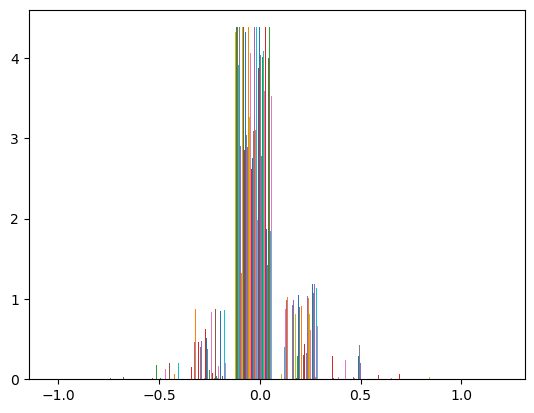

In [24]:
plt.hist(hist_data, density=True)

In [ ]:
plt.hist(hist_data_1, density=True)

Yes, the histogram(s) look like 1D Gaussian hence the values are now normally distributed around 0(the new mean)in Y after being projected over one of the eigenvectors. 